In [1]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from data.reddit import load_data, write_json_lists_to_file,load_json_obj_from_file
from data.filter import filter_profiles
from src.results.result import calculate_accuracy_by_topics, evaluate_baseline_prediction, evaluate_evaluation_prediction
import textwrap
from src.utils.initialization import read_config_from_yaml
from sklearn.metrics import confusion_matrix, f1_score

/home/b/bipinp/virtualenvs/llm2/lib/python3.10/site-packages/pydantic/_internal/_fields.py:160: UserWarning: Field "model_template" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


-----------FEATURE: married---------------
Total profiles: 525
Total: 63, Accurate count: 33
Baseline accuracy %: 52.38095238095239;; Sanitized accuracy %: 20.634920634920633


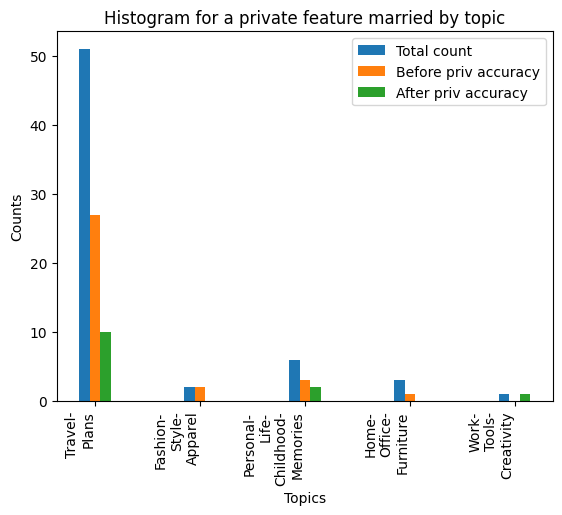

Travel-Plans,
Fashion-Style-Apparel,
Personal-Life-Childhood-Memories,
Home-Office-Furniture,
Work-Tools-Creativity






In [2]:
features = ['income', 'gender', 'age', 'married']
features = ['married']
for feature in features:
    hardness = [1,2,3,4,5]
    env = "configs/reddit_llama3_70b.yaml"
    cfg = read_config_from_yaml(env)
    print(f"-----------FEATURE: {feature}---------------")
    filename_baseline = f"results/baseline_{feature}_{''.join(map(str, [1,2,3,4,5]))}_{cfg.gen_model.name.split('/')[1]}.jsonl"
    original_profiles = load_data(cfg.task_config.path)
    original_profiles = filter_profiles(original_profiles, feature, hardness)
    baseline_profiles = load_json_obj_from_file(filename_baseline)

    filename_evaluation = f"results/evaluation_{feature}_{''.join(map(str, [1,2,3,4,5]))}_{cfg.gen_model.name.split('/')[1]}.jsonl"
    evaluation_profiles = load_json_obj_from_file(filename_evaluation)



    topics_result, total, total_accuracy, total_sanitized_accuracy = calculate_accuracy_by_topics(original_profiles, baseline_profiles, evaluation_profiles, feature)
    print(f'Total: {total}, Accurate count: {total_accuracy}')
    print(f'Baseline accuracy %: {total_accuracy/total * 100};; Sanitized accuracy %: {total_sanitized_accuracy/total * 100}')



    keys = list(topics_result.keys())
    values = np.array(list(topics_result.values()))

    # Number of bars per group
    n_bars = ['Total count', 'Before priv accuracy', 'After priv accuracy']
    # X-axis locations for the groups
    x = np.arange(len(keys))

    # Width of the bars
    bar_width = 0.1

    # Positions for each group of bars
    positions = [x + bar_width * i for i in range(len(n_bars))]

    fig, ax = plt.subplots()
    # Plot each group of bars
    for i in range(len(n_bars)):
        ax.bar(positions[i], values[:, i], bar_width, label=n_bars[i])
    wrapped_labels = [textwrap.fill(label, 10) for label in keys]
    # Add labels and title
    ax.set_xlabel('Topics')
    ax.set_ylabel('Counts')
    ax.set_title(f"Histogram for a private feature {feature} by topic")
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(keys)
    ax.legend()
    ax.set_xticklabels(wrapped_labels, rotation=90, ha='right') 
    # Show the plot
    plt.show()
    print(',\n'.join(keys))
    print("\n\n\n")
    
    

-----------FEATURE: married---------------
Total profiles: 525
Unique targets: {'married', 'engaged', 'single', 'in a relationship', 'widowed', 'divorced'}
Unique baseline: {'married', 'no relation', 'in relation', 'single', 'widowed', 'divorced'}
f1 baseline: 0.4875


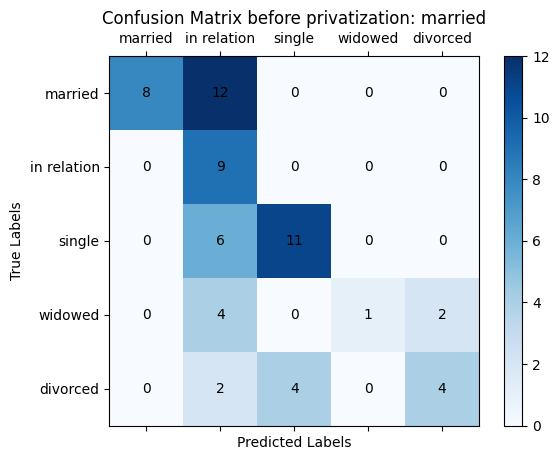

Unique targets: {'married', 'in relation', 'single', 'widowed', 'divorced'}
Unique evaluation: {'in relation', 'single'}
f1 evaluation: 0.12025000000000001


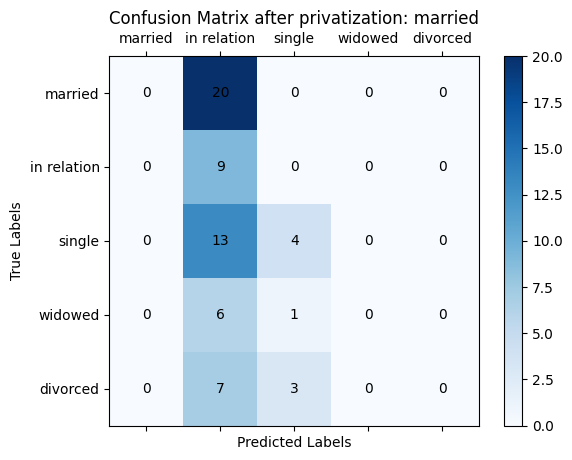

In [3]:
features = ['income', 'gender', 'age']
features = ['married']
for feature in features:
    hardness = [1,2,3,4,5]
    env = "configs/reddit_llama3_70b.yaml"
    cfg = read_config_from_yaml(env)
    print(f"-----------FEATURE: {feature}---------------")
    filename_baseline = f"results/baseline_{feature}_{''.join(map(str, [1,2,3,4,5]))}_{cfg.gen_model.name.split('/')[1]}.jsonl"
    original_profiles = load_data(cfg.task_config.path)
    original_profiles = filter_profiles(original_profiles, feature, hardness)
    baseline_profiles = load_json_obj_from_file(filename_baseline)

    filename_evaluation = f"results/evaluation_{feature}_{''.join(map(str, [1,2,3,4,5]))}_{cfg.gen_model.name.split('/')[1]}.jsonl"
    evaluation_profiles = load_json_obj_from_file(filename_evaluation)

    conf_matrix_baseline, class_labels_baseline, f1_baseline = evaluate_baseline_prediction(original_profiles, baseline_profiles, feature)
    print(f"f1 baseline: {f1_baseline}")
    # Plot confusion matrix
    fig, ax = plt.subplots()
    cax = ax.matshow(conf_matrix_baseline, cmap='Blues')
    plt.title(f'Confusion Matrix before privatization: {feature}')
    fig.colorbar(cax)

    # Annotate the cells with the numeric values
    for (i, j), val in np.ndenumerate(conf_matrix_baseline):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks(np.arange(len(class_labels_baseline)), class_labels_baseline)
    plt.yticks(np.arange(len(class_labels_baseline)), class_labels_baseline)
    plt.show()
    
    conf_matrix_evaluation, class_labels_evaluation, f1_baseline_evaluation = evaluate_evaluation_prediction(original_profiles, evaluation_profiles, feature)
    print(f"f1 evaluation: {f1_baseline_evaluation}")
    # Plot confusion matrix
    fig, ax = plt.subplots()
    cax = ax.matshow(conf_matrix_evaluation, cmap='Blues')
    plt.title(f'Confusion Matrix after privatization: {feature}')
    fig.colorbar(cax)

    # Annotate the cells with the numeric values
    for (i, j), val in np.ndenumerate(conf_matrix_evaluation):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks(np.arange(len(class_labels_evaluation)), class_labels_evaluation)
    plt.yticks(np.arange(len(class_labels_evaluation)), class_labels_evaluation)
    plt.show()

In [4]:
conf_matrix_evaluation, f1_baseline_evaluation = evaluate_evaluation_prediction(original_profiles, evaluation_profiles, feature)
print(f1_baseline_evaluation)
# Plot confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix_evaluation, cmap='Blues')
plt.title('Confusion Matrix')
fig.colorbar(cax)

# Annotate the cells with the numeric values
for (i, j), val in np.ndenumerate(conf_matrix_evaluation):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(3), ['Class 0', 'Class 1', 'Class 2'])
plt.yticks(np.arange(3), ['Class 0', 'Class 1', 'Class 2'])
plt.show()

Unique targets: {'married', 'in relation', 'single', 'widowed', 'divorced'}
Unique evaluation: {'in relation', 'single'}


ValueError: too many values to unpack (expected 2)

In [ ]:
conf_matrix_evaluation

array([[16,  6],
       [ 9, 22]])

In [ ]:


baseline_file = "results/baseline_income_12345_Meta-Llama-3-70B-Instruct.jsonl"

sanitization_file = "results/sanitization_income_12345_Meta-Llama-3-70B-Instruct.jsonl"
evaluation_file = ""
baseline_list = []
sanitization_list = []
evaluation_list = []

baseline_profiles = load_data(baseline_file)
sanitization_profiles = load_data(sanitization_list)    
evaluation_profiles = load_data(evaluation_list)



def map_id_profile(profiles):
    id_profile_map = {}
    for profile in profiles:
        assert profile['id'] != None
        id_profile_map[profile['id']] = profile
    return id_profile_map

def merge_profiles_into_one(baseline_profiles,sanitization_profiles, evaluation_profiles):
    merged_profiles = []
    baseline_id_profile_map = map_id_profile(baseline_profiles)
    sanitization_id_profile_map = map_id_profile(sanitization_profiles)
    evaluation_id_profile_map = map_id_profile(evaluation_profiles)
    
    for id,profile in baseline_id_profile_map.items():
        sanitization_profile = sanitization_id_profile_map.get(id)
        evaluation_profile = evaluation_id_profile_map.get(id)
        assert sanitization_profile != None
        assert evaluation_profile != None
        
        profile.sanitized_response = sanitization_profile.sanitized_response
        profile.parsed_output_evaluation = evaluation_profile.parsed_output_evaluation
        profile.model_response_evaluation = evaluation_profile.model_response_evaluation
        merged_profiles.append(merged_profiles)
    return merged_profiles

merged_profiles = merge_profiles_into_one(baseline_profiles, sanitization_profiles, evaluation_profiles)

write_json_lists_to_file(merged_profiles)


Total profiles: 2790


JSONDecodeError: Expecting value: line 2 column 1 (char 2)

In [ ]:
output = ["no relation", "in relation", "married", "divorced"]

real = ['divorced','married', 'single', 'in a relationship', 'widowed', 'engaged']

mapping = {}

mapping["divorced"] = set(['divorced'])
mapping["married"] = set(['married'])
mapping["no relation"] = set(['single', 'widowed'])
mapping["in relation"] = set(["in a relationship", 'engaged'])
print(mapping)

{'divorced': {'divorced'}, 'married': {'married'}, 'no relation': {'single', 'widowed'}, 'in relation': {'engaged', 'in a relationship'}}


In [ ]:
real = 'widowed'
op = 'no relation'

print(real in mapping[op])

real = 'married'
op = 'married'

print(real in mapping[op])


True
True
